# SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

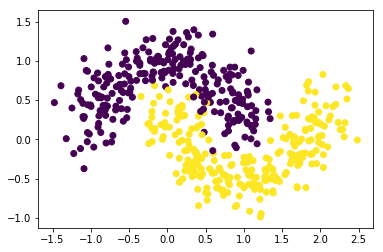

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver='liblinear', C = 0.9, penalty = 'l1') 
svm = SVC(kernel='linear', C=0.3, decision_function_shape = 'ovr') 

Параметры в клетке выше подобраны, согласно условию, вручную за счет того, насколько хорошим получается результат при вычислениях ниже:

Обучаем логистическую регрессию:

In [4]:
lr.fit(moons_points, moons_labels)

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
svm.fit(moons_points, moons_labels)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
res_1 = lr.predict(moons_points)
res_2 = svm.predict(moons_points)

score_lr = f1_score(moons_labels, res_1, average='macro')
score_svm = f1_score(moons_labels, res_2, average='macro')

print('lr accuracy: ', score_lr)
print('svm accuracy: ', score_svm)


lr accuracy:  0.8599910394265233
svm accuracy:  0.8519905273937531


Логистическая регрессия:

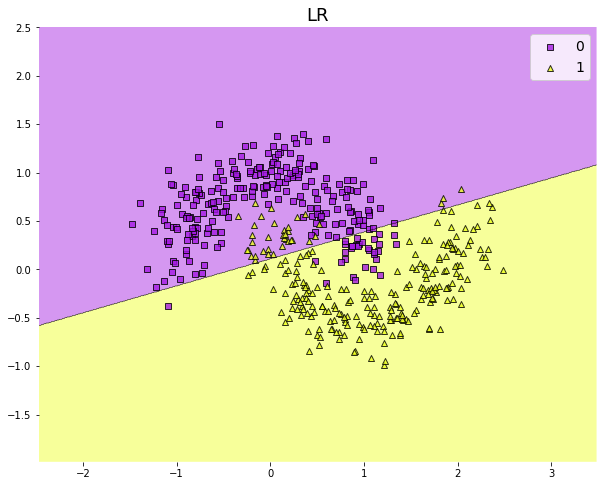

In [7]:
fig = plt.figure(figsize=(10, 8))
colores ='#a31ae1,#eeff20'
fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = lr, legend = 2, colors = colores)
plt.title('LR', fontsize=18)
plt.legend(fontsize=14)
plt.show()

SVM:

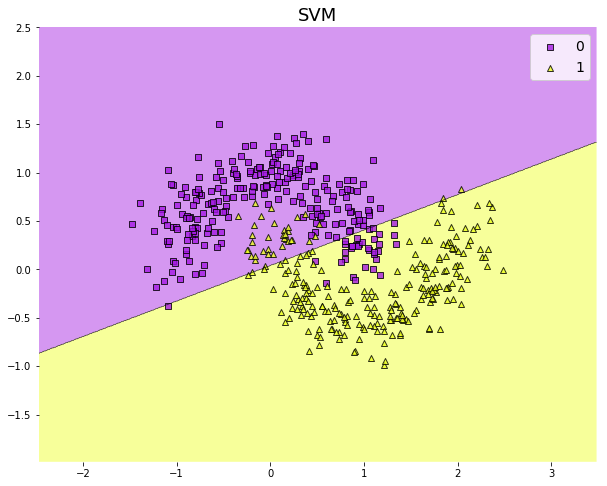

In [8]:
fig = plt.figure(figsize=(10, 8))
colores ='#a31ae1,#eeff20'
fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = svm, legend = 2, colors = colores)
plt.title('SVM', fontsize=18)
plt.legend(fontsize=14)
plt.show()

Рассмотрим classification metric: accuracy:

In [9]:
lr_pred = lr.predict(moons_points)
svm_pred = svm.predict(moons_points)

In [10]:
print( "lr accuracy: ", accuracy_score(moons_labels, lr_pred))
print( "svm accuracy: ", accuracy_score(moons_labels, svm_pred))

lr accuracy:  0.86
svm accuracy:  0.852


Другой вариант картинок (без mlxtend):

In [11]:
from matplotlib.colors import ListedColormap

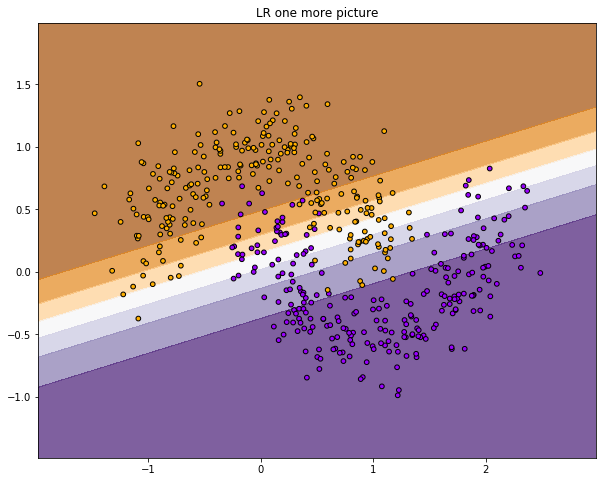

In [12]:
fig = plt.figure(figsize = (10, 8))

step_size = 0.02 

x_min = moons_points[:, 0].min() - 0.5
x_max = moons_points[:, 0].max() + 0.5
y_min = moons_points[:, 1].min() - 0.5
y_max = moons_points[:, 1].max() + 0.5

xs, ys = np.meshgrid(np.arange(x_min, x_max, step_size),
                         np.arange(y_min, y_max, step_size))

cm_background = plt.cm.PuOr
cm_points = ListedColormap(['#FFAF00', '#9900FF'])

moons_pred_1 = (lr.predict_proba(np.c_[xs.ravel(), ys.ravel()])[:, 1]).reshape(xs.shape)

plt.contourf(xs, ys, moons_pred_1, cmap = cm_background, alpha = 0.7)

plt.scatter(moons_points[:, 0], moons_points[:, 1], c = moons_labels, cmap = cm_points,
                   edgecolors='black', s = 22)

plt.title("LR one more picture")
       
plt.show()

Абсолютно аналогично для SVM (надо добавить probability):

In [13]:
svm = SVC(kernel='linear', C=0.3, decision_function_shape = 'ovr', probability = True) 
svm.fit(moons_points, moons_labels)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

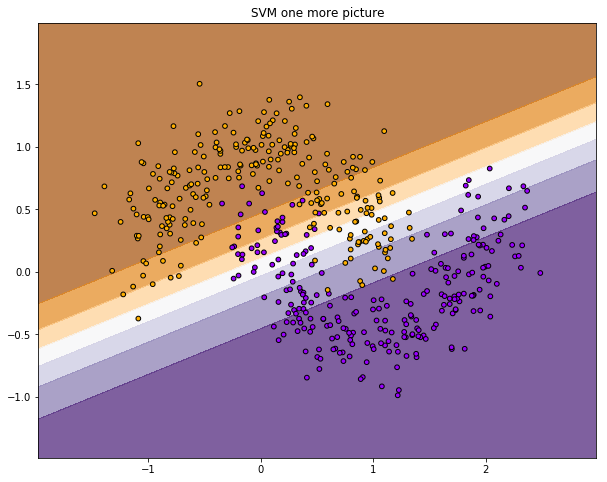

In [14]:
fig = plt.figure(figsize = (10, 8))

step_size = 0.02 

x_min = moons_points[:, 0].min() - 0.5
x_max = moons_points[:, 0].max() + 0.5
y_min = moons_points[:, 1].min() - 0.5
y_max = moons_points[:, 1].max() + 0.5

xs, ys = np.meshgrid(np.arange(x_min, x_max, step_size),
                         np.arange(y_min, y_max, step_size))

cm_background = plt.cm.PuOr
cm_points = ListedColormap(['#FFAF00', '#9900FF'])

moons_pred_1 = (svm.predict_proba(np.c_[xs.ravel(), ys.ravel()])[:, 1]).reshape(xs.shape)

plt.contourf(xs, ys, moons_pred_1, cmap = cm_background, alpha = 0.7)

plt.scatter(moons_points[:, 0], moons_points[:, 1], c = moons_labels, cmap = cm_points,
                   edgecolors='black', s = 22)

plt.title("SVM one more picture")
       
plt.show()

Как можно заметить, LR и SVM with linear kernel дают нам примерно одинаковое значение accuracy (в районе 0.85), что является довольно неплохим результатом (можно заметить, что большая часть точек на графиках попадает в нужную область), однако очевидно, что этот результат еще можно улучшить. В данном случае проблема заключается в том, что граница между областями - прямая линия, а за счет самого расположения точек из условия можно заметить, что разделить их прямой на две разные области довольно проблематично, что и подводит нас к следующему пункту.

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Various kernels:

In [15]:
svm_lin = SVC(kernel='linear') 
svm_poly = SVC(kernel='poly') 
svm_rbf = SVC(kernel='rbf') 
svm_sigmoid = SVC(kernel='sigmoid') 

Воспользуемся тем, что в этом пункте можно использовать GridSearch и напишем его (на самом деле, скорее для того, чтобы посмотреть на приблизительный результат, и потом его уже улучшать):

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

Pipelines:

In [17]:
pipe_lin = Pipeline(memory = None, steps = [("scaler", MinMaxScaler()), ("svm", svm_lin)])
pipe_poly = Pipeline(memory = None, steps = [("scaler", MinMaxScaler()), ("svm", svm_poly)])
pipe_rbf = Pipeline(memory = None, steps = [("scaler", MinMaxScaler()), ("svm", svm_rbf)])
pipe_sigm = Pipeline(memory = None, steps = [("scaler", MinMaxScaler()), ("svm", svm_sigmoid)])

Разные параметры (для всех типов kernels).

In [18]:
c_param = np.linspace(0.01, 1, 10)
dfs = ['ovr', 'ovo']
degree_param = np.linspace(1, 10, 10)
gamma_param = np.linspace(0.001, 1, 10)
coef0_param = np.linspace(0, 1, 5)
coef0_param_sigm = np.linspace(-1, 1, 11)
shrinking_param = [True, False]

Теперь рассматриваем параметры для каждого из kernels:

In [19]:
paramers_lin = {'svm__C':c_param, 'svm__decision_function_shape':dfs, 'svm__shrinking':shrinking_param}
paramers_poly = {'svm__C':c_param, 'svm__decision_function_shape':dfs,
                'svm__degree':degree_param, 'svm__gamma':gamma_param, 'svm__coef0':coef0_param}
paramers_rbf = {'svm__C':c_param, 'svm__decision_function_shape':dfs, 'svm__coef0':coef0_param}
paramers_sigm = {'svm__C':c_param, 'svm__decision_function_shape':dfs, 'svm__gamma':gamma_param, 
                'svm__coef0':coef0_param_sigm}

In [20]:
grid_lin = GridSearchCV(pipe_lin, param_grid = paramers_lin, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_poly = GridSearchCV(pipe_poly, param_grid = paramers_poly, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_rbf = GridSearchCV(pipe_rbf, param_grid = paramers_rbf, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_sigm = GridSearchCV(pipe_sigm, param_grid = paramers_sigm, cv = 5, scoring = 'accuracy', n_jobs = -1)

In [21]:
grid_lin.fit(moons_points, moons_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'svm__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'svm__decision_function_shape': ['ovr', 'ovo'], 'svm__shrinking': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
lin_best_params = grid_lin.best_params_
print('Linear kernel:')
print(lin_best_params)

Linear kernel:
{'svm__C': 0.34, 'svm__decision_function_shape': 'ovr', 'svm__shrinking': True}


In [23]:
grid_poly.fit(moons_points, moons_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'svm__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'svm__decision_function_shape': ['ovr', 'ovo'], 'svm__degree': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 'svm__gamma': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]), 'svm__coef0': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
poly_best_params = grid_poly.best_params_
print('Poly kernel:')
print(poly_best_params)

Poly kernel:
{'svm__C': 0.78, 'svm__coef0': 1.0, 'svm__decision_function_shape': 'ovr', 'svm__degree': 10.0, 'svm__gamma': 1.0}


In [25]:
grid_rbf.fit(moons_points, moons_labels)

C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'svm__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'svm__decision_function_shape': ['ovr', 'ovo'], 'svm__coef0': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
rbf_best_params = grid_rbf.best_params_
print('Rbf kernel:')
print(rbf_best_params)

Rbf kernel:
{'svm__C': 0.34, 'svm__coef0': 0.0, 'svm__decision_function_shape': 'ovr'}


In [27]:
grid_sigm.fit(moons_points, moons_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'svm__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'svm__decision_function_shape': ['ovr', 'ovo'], 'svm__gamma': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]), 'svm__coef0': array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [28]:
sigm_best_params = grid_sigm.best_params_
print('Sigmoid kernel:')
print(sigm_best_params)

Sigmoid kernel:
{'svm__C': 0.56, 'svm__coef0': -0.3999999999999999, 'svm__decision_function_shape': 'ovr', 'svm__gamma': 0.667}


Итак, оптимальные параметры (некоторые из них отличаются от тех, что были выявлены в гридсерче выше, потому что работает он довольно долго, поэтому большую точность там тоже долго будет получать, так что часть параметров уже рассмотрена за счет полученных ниже значений и графиков):

In [53]:
lin_best_params = [0.22, 'ovr', True]
poly_best_params = [0.78, 'ovr', 5, 1, 1]
rbf_best_params = [0.41, 'ovr', 0.21]
sigm_best_params = [0.69, 'ovr', 0.09, -0.07]

В большинстве случаев GridSearch дал довольно неплохие значения, в других примерные, которые можно улучшить, в некоторых он вообще не очень хорошие значения дал (например, для sigmoid найденные параметры давали точность около 0.67, поэтому их уже исходя из картинки ниже и вычисленной accuracy пришлось менять вручную).

У rbf изначально было 0.946, удалось поднять выше.

У linear было вначале 0.854, также получилось улучшить, пусть и всего на 0.002.

А вот у poly точность изначально была очень хорошая, так что можно ее оставить. Единственное, была получена degree = 10, точность (accuracy) там была 0.984, однако 10 - это довольно много (границы на картинке получались не очень красивые), так что заменила на degree = 5, точность уменьшилась всего на 0.002, зато и картинка стала лучше, и модель упростилась.

Рассмотрим теперь модели с оптимальными параметрами:

In [54]:
best_svm_lin = SVC(kernel='linear', C = lin_best_params[0], 
                   decision_function_shape = lin_best_params[1], shrinking = lin_best_params[2]) 

best_svm_poly = SVC(kernel='poly', C = poly_best_params[0], 
                   decision_function_shape = poly_best_params[1], degree = poly_best_params[2],
                   gamma = poly_best_params[3], coef0 = poly_best_params[4])

best_svm_rbf = SVC(kernel='rbf', C = rbf_best_params[0], 
                   decision_function_shape = rbf_best_params[1], coef0 = rbf_best_params[2]) 

best_svm_sigmoid = SVC(kernel='sigmoid', C = sigm_best_params[0], 
                   decision_function_shape = sigm_best_params[1], gamma = sigm_best_params[2],
                      coef0 = sigm_best_params[3]) 

In [55]:
best_svm_lin.fit(moons_points, moons_labels)
best_svm_poly.fit(moons_points, moons_labels)
best_svm_rbf.fit(moons_points, moons_labels)
best_svm_sigmoid.fit(moons_points, moons_labels)

C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.69, cache_size=200, class_weight=None, coef0=-0.07,
  decision_function_shape='ovr', degree=3, gamma=0.09, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Рассмотрим теперь картинки:

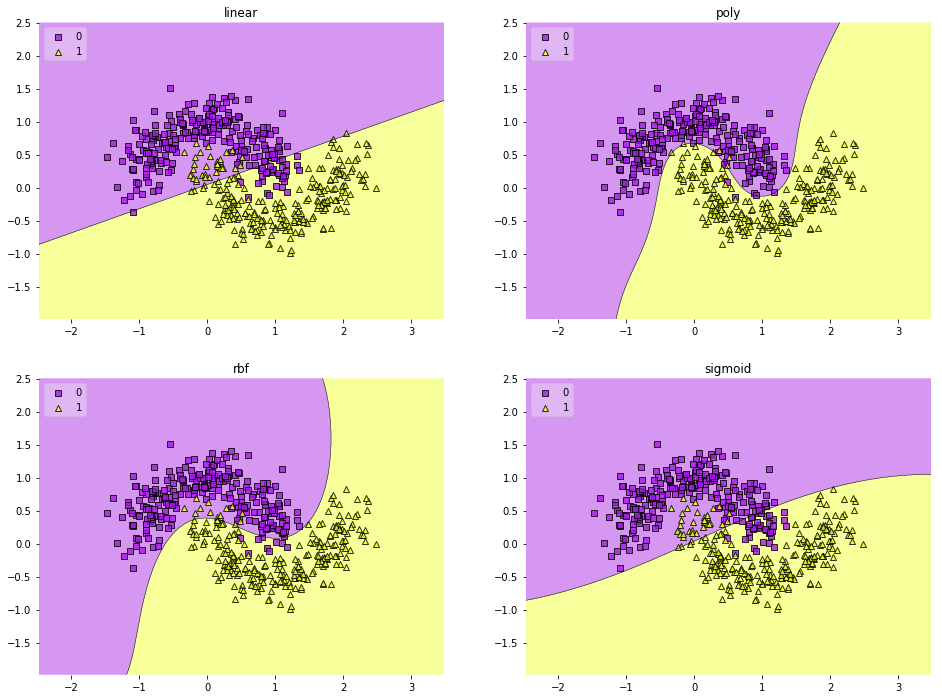

In [56]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
values = [-4.0, -1.0, 1.0, 4.0]
width = 0.8

names = ['linear', 'poly', 'rbf', 'sigmoid']
models = [best_svm_lin, best_svm_poly, best_svm_rbf, best_svm_sigmoid]

for value, ax, name, model in zip(values, axarr.flat, names, models):
    plot_decision_regions(X = moons_points, y = moons_labels, clf = model, legend = 2, colors = colores, ax = ax)
    ax.set_title('{}'.format(name))

plt.show()

Рассмотрим теперь accuracy:

In [57]:
lin_pred = best_svm_lin.predict(moons_points)
poly_pred = best_svm_poly.predict(moons_points)
rbf_pred = best_svm_rbf.predict(moons_points)
sigmoid_pred = best_svm_sigmoid.predict(moons_points)

In [58]:
print( "linear kernel accuracy: ", accuracy_score(moons_labels, lin_pred))
print( "poly kernel accuracy: ", accuracy_score(moons_labels, poly_pred))
print( "rbf kernel accuracy: ", accuracy_score(moons_labels, rbf_pred))
print( "sigmoid kernel accuracy: ", accuracy_score(moons_labels, sigmoid_pred))

linear kernel accuracy:  0.856
poly kernel accuracy:  0.982
rbf kernel accuracy:  0.954
sigmoid kernel accuracy:  0.85


Качество классификации: повысилось в сравнении с первым пунктом. Точнее, для linear kernel оно такое же и осталось, а в остальных случаях стало выше. Как я полагаю, это довольно логично, потому что у нас больше нет ограничения на то, чтобы граница была прямой, потому классифицировать объекты получилось точнее. Самая большая точность у poly kernel, на втором месте rbf. Однако, мне кажется, что rbf себя все же ведет лучше - границы более плавные, выглядят более естественно, да и работать он должен быстрее (по крайней мере, параметры получилось подобрать гораздо быстрее, чем для poly).

Граница:
* у linear kernel так и осталась прямой линией (что в принципе очевидно). 
* у poly kernel немного резковатая граница (видимо, сказывается точность классификации: из-за большой точности граница получилась не очень красивая).
* у rbf kernel очень плавная граница, при этом качество классификации довольно хорошее, то есть малое количество объектов попадает в неправильную относительно границы сторону.
* у sigmoid kernel самая плавная граница, но в одном месте (в середине рисунка) она отсекает приличную часть как желтого, так и сиреневого полумесяцев, то есть определенное количество точек попадает на противоположную сторону. Тут ситуация, наверное, противоположная с poly kernel: за счет потери точности мы получаем довольно плавную границу.

Для poly kernel я выбрала degree = 5, потому что точность получилась довольно хорошая (при 10 была немного лучше, но границы выглядели неестественно, да и модель, я думаю, усложнялась).

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [70]:
from sklearn.preprocessing import PolynomialFeatures

In [71]:
poly_features = PolynomialFeatures(degree = 5)
poly_points = poly_features.fit_transform(moons_points)

In [72]:
lr_poly = LogisticRegression(solver='liblinear', C = 0.89, penalty = 'l1') 
lr_poly.fit(poly_points, moons_labels)

LogisticRegression(C=0.89, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
lr_poly_pred = lr_poly.predict(poly_points)

In [74]:
print( "accuracy: ", accuracy_score(moons_labels, lr_poly_pred))

accuracy:  0.982


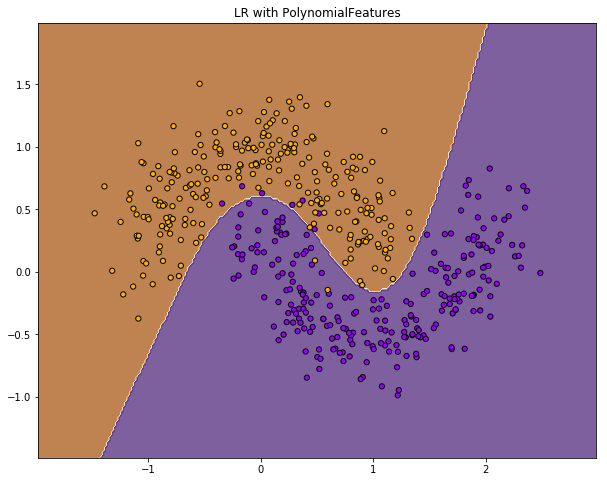

In [75]:
fig = plt.figure(figsize = (10, 8))

step_size = 0.02 

x_min = moons_points[:, 0].min() - 0.5
x_max = moons_points[:, 0].max() + 0.5
y_min = moons_points[:, 1].min() - 0.5
y_max = moons_points[:, 1].max() + 0.5

xs, ys = np.meshgrid(np.arange(x_min, x_max, step_size),
                         np.arange(y_min, y_max, step_size))

cm_background = plt.cm.PuOr
cm_points = ListedColormap(['#FFAF00', '#9900FF'])

moons_pred_poly = (lr_poly.predict(poly_features.fit_transform(np.c_[xs.ravel(), ys.ravel()]))).reshape(xs.shape)

plt.contourf(xs, ys, moons_pred_poly, cmap = cm_background, alpha = 0.7)

plt.scatter(moons_points[:, 0], moons_points[:, 1], c = moons_labels, cmap = cm_points,
                   edgecolors='black', s = 27)

plt.title("LR with PolynomialFeatures")
       
plt.show()

Сравним результаты SVM с этим решением. 

Вообще это решение работало очень быстро, намного быстрее, чем svm (особенно с poly kernel), точность у poly kernel была чуть больше, чем здесь (на тысячные доли, тут 0.982, а там было 0.984 (это при degree=10, a при degree=5 тоже 0.982), что в целом почти одинаково). В то же время мне кажется, что этот способ в какой-то мере эффективнее, поскольку точность почти такая же, а работает быстрее.

borders type: границы здесь намного красивее. В данном случае они более гладкие, чем в случае poly kernel, более плавные и выглядят более естественно.

В PolynomialFeatures была использована степень: 5, в то время как в poly kernel: тоже степень 5. Таким образом, можно заключить, что в обоих ситуациях хорошая точность достигается при примерно одинаковых значениях параметра degree.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

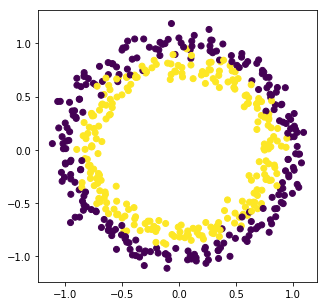

In [76]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

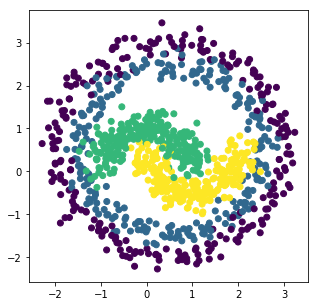

In [77]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Из SVM лучший результат был с полиномиальным ядром, так что применим именно его (возможно, немного изменив параметры).

In [78]:
best_svm_poly = SVC(kernel='poly', C = 0.78, 
                   decision_function_shape = 'ovr', degree = 6,
                   gamma = 1, coef0 = 1)
best_svm_poly.fit(points, labels)

SVC(C=0.78, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=6, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
points_poly = best_svm_poly.predict(points)
print( "poly kernel accuracy: ", accuracy_score(labels, points_poly))

poly kernel accuracy:  0.95


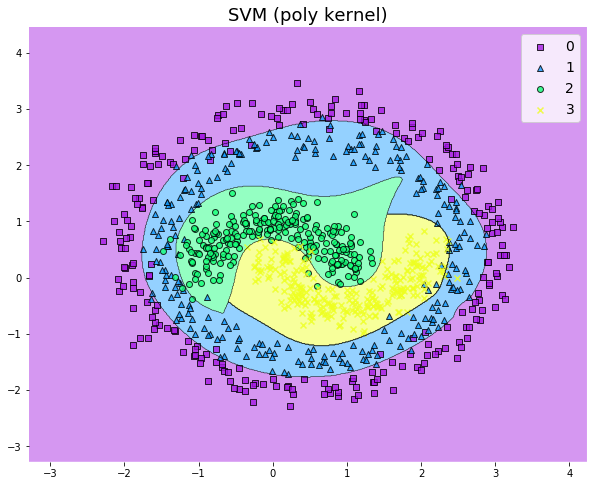

In [80]:
fig = plt.figure(figsize=(10, 8))
colores ='#a31ae1,#139AFF,#13FF78,#eeff20'
fig = plot_decision_regions(X=points, y=labels, clf=best_svm_poly, legend=2, colors = colores)
plt.title('SVM (poly kernel)', fontsize=18)
plt.legend(fontsize=14)
plt.show()

В данном случае параметр degree поставила 6, потому что при 8 уже явно видно, что происходит переобучение (например, было изолированное голубое пятно в фиолетовой области и зеленые пятна в голубой) (а при 7 были красивые разводы, но тоже не там, где надо). При этом точность была равно при degree=8: 0.949 и при при degree=7 тоже 0.949, в то время как при degree=6 она даже лучше и составляет 0.95.

Теперь попробуем использовать LR with generated features.

In [93]:
p_features = PolynomialFeatures(degree = 6)
p_points = p_features.fit_transform(points)

In [94]:
lr_p = LogisticRegression(solver='liblinear', C = 0.89, penalty = 'l1', max_iter = 10000) 
lr_p.fit(p_points, labels)

C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.89, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
lr_p_pred = lr_p.predict(p_points)
print( "LR with generated features accuracy: ", accuracy_score(labels, lr_p_pred))

LR with generated features accuracy:  0.946


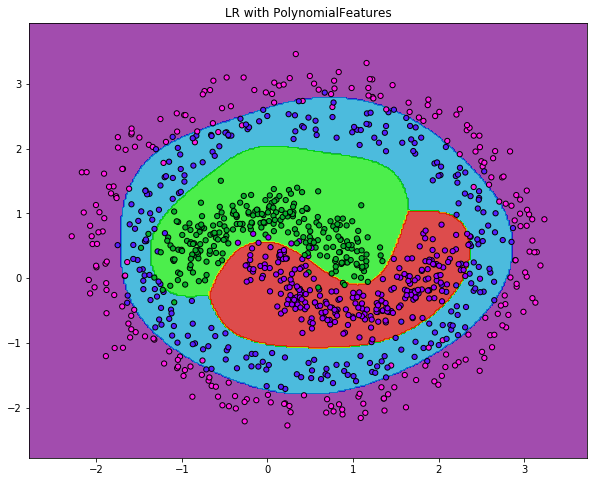

In [96]:
fig = plt.figure(figsize = (10, 8))

step_size = 0.02 

x_min = points[:, 0].min() - 0.5
x_max = points[:, 0].max() + 0.5
y_min = points[:, 1].min() - 0.5
y_max = points[:, 1].max() + 0.5

xs, ys = np.meshgrid(np.arange(x_min, x_max, step_size),
                         np.arange(y_min, y_max, step_size))

cm_background = plt.cm.nipy_spectral
cm_points = ListedColormap(['#FF1EE4', '#571EFF', '#08B12C', '#9900FF'])

moons_pred_p = (lr_p.predict(p_features.fit_transform(np.c_[xs.ravel(), ys.ravel()]))).reshape(xs.shape)

plt.contourf(xs, ys, moons_pred_p, cmap = cm_background, alpha = 0.7)

plt.scatter(points[:, 0], points[:, 1], c = labels, cmap = cm_points,
                   edgecolors='black', s = 27)

plt.title("LR with PolynomialFeatures")
       
plt.show()

Как можно заметить, в обоих случаях получилась довольно высокая точность (порядка 0.95), что является довольно хорошим результатом.

Это показывает, что обе построенные модели могут вполне удачно предсказывать верный результат. При этом вторая модель (LR) работает относительно быстрее первой, хотя точность у нее чуть-чуть меньше. 

В итоге, я бы, наверное, использовала LR with PolynomialFeatures, потому что точность уменьшается ненамного, а вот скорость работы действительно лучше.